# Тема “Обучение без учителя”

# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [83]:
X = pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
y = load_boston().target

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

model = TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(X_train_scaled)
model

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

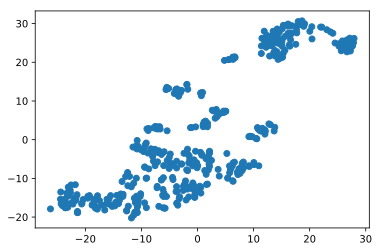

In [84]:
plt.scatter(model[:,0],model[:,1])
plt.show()

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [18]:
from sklearn.cluster import KMeans

In [82]:
kmeans = KMeans(n_clusters = 3, max_iter=100)
labels_train = kmeans.fit_predict(X_train_scaled)
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_train)

2    191
0    128
1     85
dtype: int64

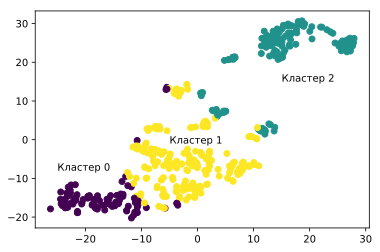

In [72]:
plt.scatter(model[:,0], model[:,1], c=labels_train)
plt.text(-25,-8, 'Кластер 0')
plt.text(-5,-1, 'Кластер 1')
plt.text(15,15, 'Кластер 2')
plt.show()

In [68]:
y_train[labels_train==0].mean()

27.87411764705882

In [69]:
y_train[labels_train==1].mean()

16.1796875

In [71]:
y_train[labels_train==2].mean()

24.971204188481675

In [73]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.0721184705882353

In [74]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.715219062500003

In [75]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42098554973821983

# * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [76]:
y_test[labels_test==0].mean()

31.35

In [77]:
y_test[labels_test==1].mean()

16.43714285714286

In [78]:
y_test[labels_test==2].mean()

21.860784313725492

In [79]:
X_test.loc[labels_test==0, 'CRIM'].mean()

0.062060000000000004

In [80]:
X_test.loc[labels_test==1, 'CRIM'].mean()

10.165531142857143

In [81]:
X_test.loc[labels_test==2, 'CRIM'].mean()

0.26607882352941176